## Libs used

In [513]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

## Dataset

In [514]:
df = pd.read_csv('./student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Preprocessing

In [515]:
ord = ['Mjob','Fjob','reason','guardian']

df[ord] = df[ord].apply(LabelEncoder().fit_transform) # Transforming nominal columns to numbers


binary = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

ct = ColumnTransformer([
    ('binary',OneHotEncoder(),binary), # Transforming these columns to 0 or 1
])


new_df = ct.fit_transform(df)
new_df = pd.DataFrame(new_df,columns=ct.get_feature_names_out())

df = df.drop(binary,axis=1).reset_index()
new_df = new_df.reset_index()
df = pd.concat([df,new_df],axis=1)
df = df.drop('index',axis=1)

### The 10 columns most correlated with the grades

In [200]:
grades_corr = df.corr()[['G1','G2','G3']].sort_values(by=['G1','G2','G3'],ascending=False)[:10]
grades_corr.index

Index(['G1', 'G2', 'G3', 'binary__schoolsup_no', 'Medu', 'Fedu',
       'binary__higher_yes', 'studytime', 'reason', 'binary__sex_M'],
      dtype='object')

<Axes: >

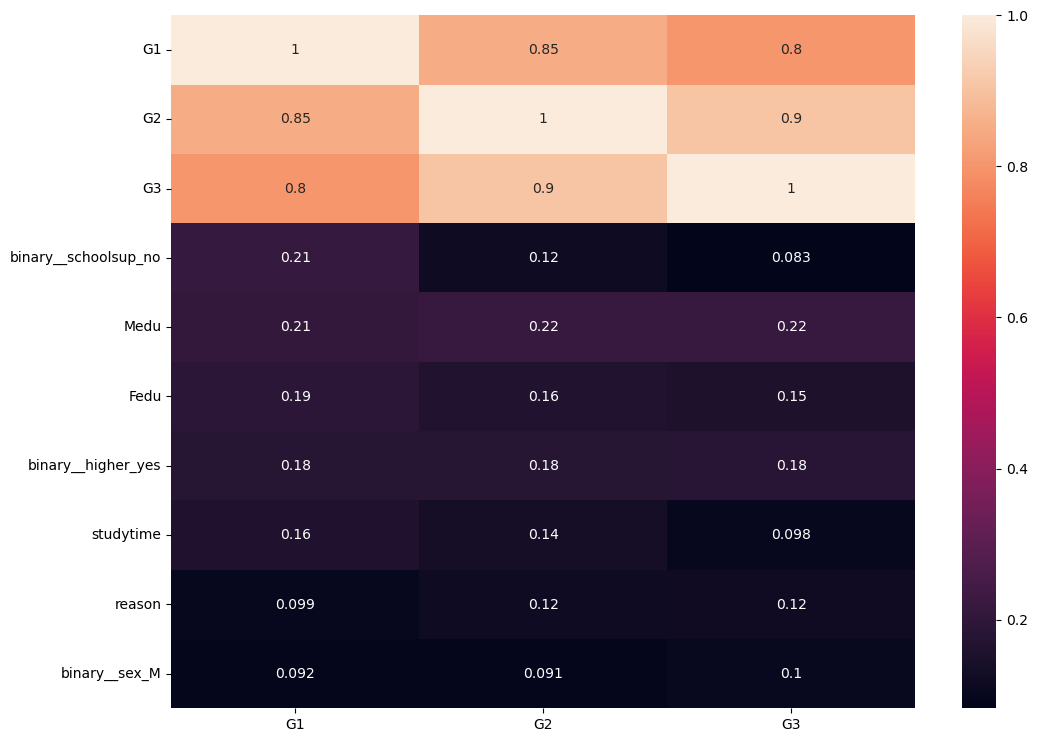

In [201]:
plt.figure(figsize=(12,9))
sns.heatmap(grades_corr,annot=True)

### Default Test Without PCA

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

X = df.drop('G3',axis=1)
y = df['G3']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [508]:
lr = LinearRegression()
cross_val_score(estimator=lr,X=x_train,y=y_train,cv=3,scoring='r2').mean()

0.8126805698358268

In [509]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

r2score = r2_score(y_true=y_test,y_pred=y_pred)
r2score

0.7947708519011207

### PCA Test

In [586]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca_data = pd.DataFrame(pca.fit_transform(X),columns=pca.get_feature_names_out())

lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(pca_data,y,test_size=0.3,random_state=42)

In [587]:
cross_val_score(estimator=lr,X=x_train,y=y_train,cv=3,scoring='r2').mean()

0.8317917590863623

In [588]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test).round(1).__abs__()

r_score = r2_score(y_pred=y_pred,y_true=y_test)
r_score

0.8068402251291409